In [1]:
import pickle
with open('ROMS_5yr_daydic.pkl', 'rb') as file:
    daydic = pickle.load(file)

with open('ROMS_5yr_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

In [2]:
from datetime import datetime, timedelta
def add_days_to_date(days_to_add):

    days_to_add = days_to_add + 1462
    
    input_date = '1990-01-01 00:00:00' # Beginning date of file 1462

    if not isinstance(input_date, datetime):
        input_date = datetime.strptime(input_date, '%Y-%m-%d %H:%M:%S')
    
    if isinstance(days_to_add, np.ndarray):
        days_to_add = days_to_add.item()
    
    new_date = input_date + timedelta(days=days_to_add)
    
    return new_date


# days_to_add = ocean_time[0].data

# new_date = add_days_to_date(days_to_add)

In [3]:
import netCDF4 as nc
import numpy as np
fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_07401.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho']
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho']
lat_rho = np.transpose(lat_rho, axes=(1, 0))
h = dataset.variables['h']
h = np.transpose(h, (1, 0))

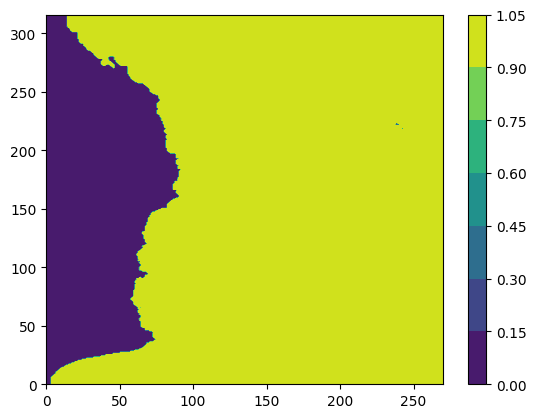

In [24]:
plt.contourf(mask_u)
plt.colorbar()

In [21]:
mask_u  = dataset.variables['mask_u'][:]

In [4]:
previous_file_idx = -1

/scratch/pbs.5840577.kman.restech.unsw.edu.au/ipykernel_467223/6354594.py:46: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(pc, label='[ms-1]')


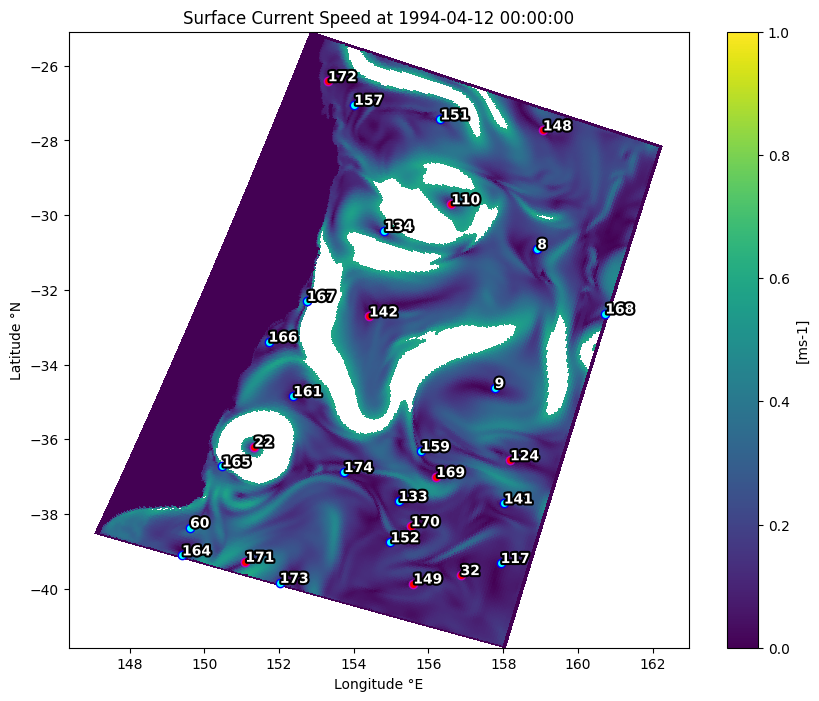

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import os

for day in range(100,101):

    t = day - 1
    t_mod = t % 30
    file_idx = np.floor(t/30)
    if file_idx != previous_file_idx:
        fnumber = '0'+str(round(1461+ file_idx*30))
        dataset = nc.Dataset('/srv/scratch/z3533156/26year_BRAN2020/outer_avg_'+str(fnumber)+'.nc')
        u_east = dataset.variables['u_eastward']
        u_east = np.transpose(u_east, axes=(3, 2, 1, 0))
        u_east = np.flip(u_east, axis=2)
        u_east_surf = u_east[:,:,0,:]
        u_east_surf = np.where(u_east_surf > 1e30, 0, u_east_surf)
        del u_east
        v_north = dataset.variables['v_northward']
        v_north = np.transpose(v_north, axes=(3, 2, 1, 0))
        v_north = np.flip(v_north, axis=2)
        v_north_surf = v_north[:,:,0,:]
        v_north_surf = np.where(v_north_surf > 1e30, 0, v_north_surf)
        del v_north
        surf_current_speed = np.sqrt(u_east_surf**2+v_north_surf**2)
        surf_current_speed = np.where(surf_current_speed > 1, np.nan, surf_current_speed)
        del u_east_surf, v_north_surf
        previous_file_idx = file_idx
    plt.figure(figsize=(10, 8))
    pc = plt.pcolor(lon_rho, lat_rho, surf_current_speed[:,:,t_mod],vmin=0,vmax=1, shading='auto')
    # pc = plt.contour(lon_rho, lat_rho, ow_surf[:,:,t_mod], levels=[-2E-11])
    daydata = daydic['Day'+str(day)]
    for e in daydata.index:
        edata = daydata.loc[e]
        if edata.Vort > 0:
            plt.scatter(edata.Lon,edata.Lat, color='red',edgecolors='m')
        else:
            plt.scatter(edata.Lon,edata.Lat, color='cyan',edgecolors='b')
        text = plt.text(edata.Lon,edata.Lat,round(edata.Id),color='w',fontweight='bold')
        text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])


    
    new_date = add_days_to_date(day)

    plt.colorbar(pc, label='[ms-1]')
    plt.title(f'Surface Current Speed at '+str(new_date))
    plt.xlabel('Longitude °E')
    plt.ylabel('Latitude °N')
    plt.axis('equal')

    # plt.savefig(os.path.join('/srv/scratch/z5297792/plots/', str(day)+'.png'))

plt.show()

In [6]:
eddies['Eddy60']

,Lon,Lat,Vort,Id,Age
Day20,151.100867,-36.268949,-0.000048,60.0,88
Day21,151.118405,-36.369061,-0.000049,60.0,88
Day22,151.144704,-36.376768,-0.000039,60.0,88
Day23,151.197311,-36.392182,-0.000045,60.0,88
Day24,151.206167,-36.442238,-0.000050,60.0,88
...,...,...,...,...,...
Day103,149.539616,-38.478649,-0.000036,60.0,88
Day104,149.539616,-38.478649,-0.000031,60.0,88
Day105,149.521340,-38.520998,-0.000032,60.0,88
Day106,149.548407,-38.528705,-0.000032,60.0,88


/scratch/pbs.5840577.kman.restech.unsw.edu.au/ipykernel_467223/815994323.py:8: UserWarning: The following kwargs were not used by contour: 'shading'
  pc = plt.contourf(lon_rho, lat_rho, h, shading='auto')


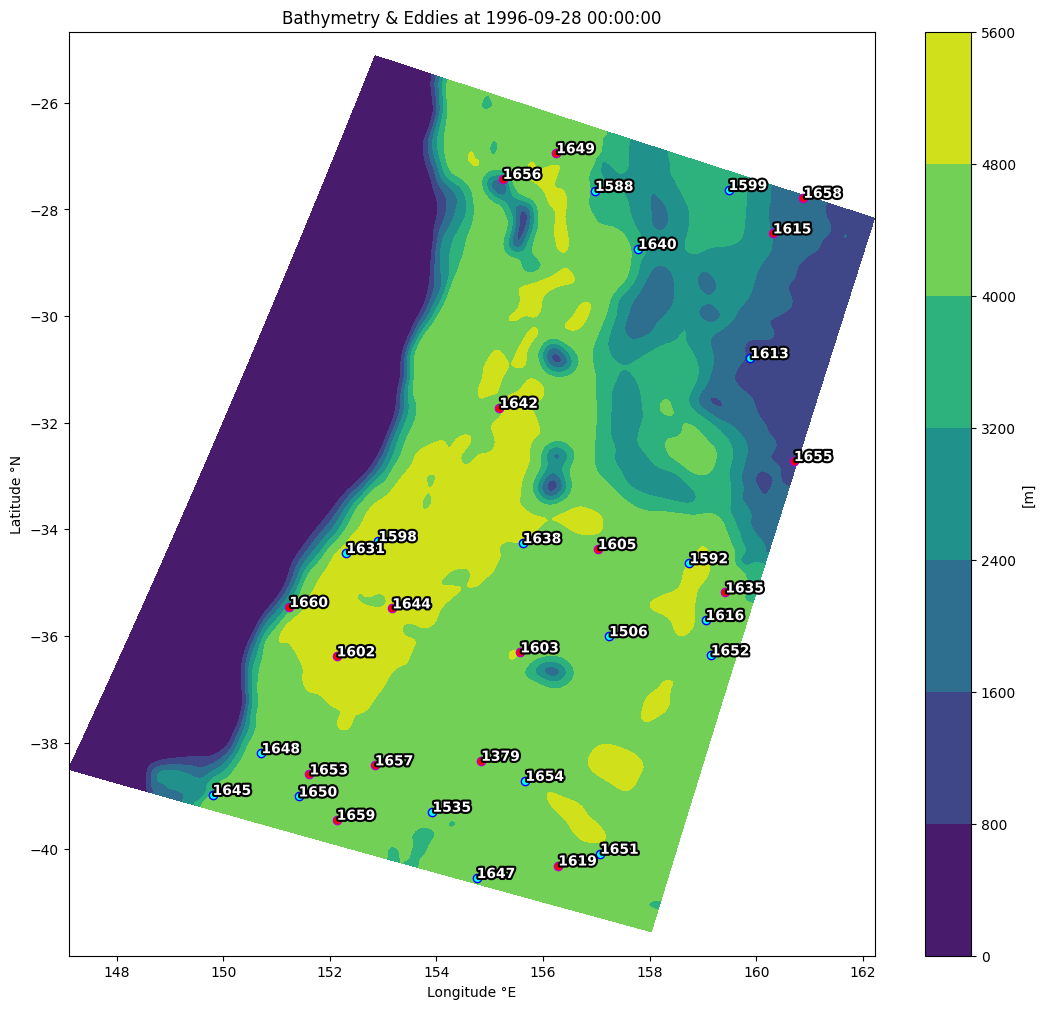

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import os

for day in range(1000,1001):

    plt.figure(figsize=(13, 12))
    pc = plt.contourf(lon_rho, lat_rho, h, shading='auto')
    daydata = daydic['Day'+str(day)]
    for e in daydata.index:
        edata = daydata.loc[e]
        if edata.Vort > 0:
            plt.scatter(edata.Lon,edata.Lat, color='red',edgecolors='m')
        else:
            plt.scatter(edata.Lon,edata.Lat, color='cyan',edgecolors='b')
        text = plt.text(edata.Lon,edata.Lat,round(edata.Id),color='w',fontweight='bold')
        text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])

    new_date = add_days_to_date(day)

    plt.colorbar(pc, label='[m]')
    plt.title(f'Bathymetry & Eddies at '+str(new_date))
    plt.xlabel('Longitude °E')
    plt.ylabel('Latitude °N')
    plt.axis('equal')

    # plt.savefig(os.path.join('/Users/regdowse/Desktop/h_plots/', str(day)+'.png'))

plt.show()